<img src="https://www.uc3m.es/ss/Satellite?blobcol=urldata&blobkey=id&blobtable=MungoBlobs&blobwhere=1371573952659">

---

# WEB ANALYTICS COURSE 4 - SEMESTER 2
# BACHELOR IN DATA SCIENCE AND ENGINEERING

# LAB DATA VISUALIZATION IN THE WEB

---


## *Participants:*

Beltran Valero 100451816

Annunziata Alvárez-Cascos 100451939

Gracia Estrán 100452014

Marta Almagro 100451979

In this block we will use data from the *Instituto Nacional de Estadística* [INE](https://www.ine.es/index.htm). We will be focus on the Tourism Sector.

We are going to analyze the tourism from two points of view. On the one hand, we are going to use the data that give us information on the history of travel in Spain. On the other hand, we will analyze employment in the tourism sector. You can visit the INE website for more information about the datasets. But in this [folder](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing) you can find the files that we will use in the labs.

# Lab1: Data Processing and Visualization in Python

## 0. Lab Preparation

1.  Study and have clear the concepts explained in the theoretical class and the introductory lab.

2.   Gain experience with the use of the [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and/or [Seaborn](https://seaborn.pydata.org/) and [Folium](https://python-visualization.github.io/folium/). The exercises of this lab will be mainly based on the utilization of functions offered by these libraries for data cleaning and data processing.

3. It is assumed students have experience in using Python notebooks. Either a local installation (e.g., local python installation + Jupyter) or a cloud-based solution (e.g., Google Colab). *We recommend the second option*.

## 1. Lab Introduction

* In this lab, we will prepare our dataset for later analysis and visualization using [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and/or [Seaborn](https://seaborn.pydata.org/) and [Folium](https://python-visualization.github.io/folium/).

* The lab will be done in groups of 2 people.

* The lab defines a set of milestones the students must complete. Upon completing every milestone, students should call the professor, who will check the correctness of the solution (*If the professor is busy, do not wait for them, move to the next milestone*).

* **The final mark will be computed as a function of the number of milestones successfully completed.**

* **Each group should also share their lab notebook with the professor upon the finalization of the lab.**

- It is recommended to use [Google Colab](https://colab.research.google.com/) to produce the Python notebook with the solution of the lab. Of course, if any student prefers using its local programming environment (e.g., jupyter) and python installation, they are welcome to do so.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import re
import seaborn as sns

from pandas.core.tools.numeric import to_numeric


## Milestone 1

1. Load the datasets about tourism ([INE_tourism](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing)) into dataframes
2. Prepare the data for later analysis, that is:
  * Split the column *Periodo* in *Year* and *Quarter* or *Month*.
  * Transform column numbers that are identified as Objects by Python to numbers. (Print *dtypes* of your dataframes to check it is done correctly).
  * Extract the Autonomous Community (CCAA) from the corresponding column.
  



In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/INE_ddbbs_DataVis_lab/INE_tourism

tourist1 = pd.read_csv('Número de turistas según comunidad autónoma de destino principal.csv', sep='\t')
tourist2 = pd.read_csv('Número de turistas según motivo principal del viaje.csv', sep='\t')
viajes1 = pd.read_csv('Viajes con destino principal interno, pernoctaciones, duración media y gasto por tipo de destino principal, según comunidad autónoma de residencia de los viajeros.csv', sep='\t')
viajes2 = pd.read_csv('Viajes, pernoctaciones, duración media y gasto por comunidad autónoma de residencia de los viajeros.csv', sep='\t')

/content/drive/MyDrive/Colab Notebooks/INE_ddbbs_DataVis_lab/INE_tourism


In [ ]:
#Split the column Periodo in Year and Quarter or Month.
tourist1['Year'] = tourist1['Periodo'].str[:4]
tourist1['Month'] = tourist1['Periodo'].str[5:]
tourist1 = tourist1.drop('Periodo', axis=1)

#Transform column numbers that are identified as Objects by Python to numbers.
tourist1['Total'] = pd.to_numeric(tourist1['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')
tourist1['Year'] = pd.to_numeric(tourist1['Year'])
tourist1['Month'] = pd.to_numeric(tourist1['Month'])
print(tourist1.dtypes)

#Extract the Autonomous Community (CCAA) from the corresponding column.
##CCAA1 = list(tourist1['Comunidades autónomas'].unique())
#print(CCAA1)

tourist1['Codigo comunidad'] = tourist1['Comunidades autónomas'].apply(lambda x: 0 if x == 'Total' or x == 'Otras Comunidades Autónomas' else int(x.split()[0]))
tourist1['Comunidad Autonoma'] = tourist1['Comunidades autónomas'].apply(lambda x: x if x == 'Total' or x == 'Otras Comunidades Autónomas' else ' '.join(x.split()[1:]))
tourist1 = tourist1.drop(columns=['Comunidades autónomas'])
# Visualizar el resultado
tourist1

Comunidades autónomas     object
Tipo de dato              object
Total                    float64
Year                       int64
Month                      int64
dtype: object


<ipython-input-6-4a317677c272>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tourist1['Total'] = pd.to_numeric(tourist1['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')


,Tipo de dato,Total,Year,Month,Codigo comunidad,Comunidad Autonoma
0,Dato base,4691486.00,2021,9,0,Total
1,Dato base,5194212.00,2021,8,0,Total
2,Dato base,4395384.00,2021,7,0,Total
3,Dato base,2215710.00,2021,6,0,Total
4,Dato base,1363624.00,2021,5,0,Total
...,...,...,...,...,...,...
2299,Tasa de variación acumulada,-3.51,2016,2,0,Otras Comunidades Autónomas
2300,Tasa de variación acumulada,-8.65,2016,1,0,Otras Comunidades Autónomas
2301,Tasa de variación acumulada,NaN,2015,12,0,Otras Comunidades Autónomas
2302,Tasa de variación acumulada,NaN,2015,11,0,Otras Comunidades Autónomas


In [ ]:
#Split the column Periodo in Year and Quarter or Month.
tourist2['Year'] = tourist2['Periodo'].str[:4]
tourist2['Month'] = tourist2['Periodo'].str[5:]
tourist2 = tourist2.drop('Periodo', axis=1)

#Transform column numbers that are identified as Objects by Python to numbers.
tourist2['Total'] = pd.to_numeric(tourist2['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')
tourist2['Year'] = pd.to_numeric(tourist2['Year'])
tourist2['Month'] = pd.to_numeric(tourist2['Month'])
print(tourist2.dtypes)

#No CCAA
tourist2

Motivo del viaje     object
Tipo de dato         object
Total               float64
Year                  int64
Month                 int64
dtype: object


<ipython-input-18-48f9ad7885ee>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tourist2['Total'] = pd.to_numeric(tourist2['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')


,Motivo del viaje,Tipo de dato,Total,Year,Month
0,Total,Dato base,4691486.00,2021,9
1,Total,Dato base,5194212.00,2021,8
2,Total,Dato base,4395384.00,2021,7
3,Total,Dato base,2215710.00,2021,6
4,Total,Dato base,1363624.00,2021,5
...,...,...,...,...,...
1147,Otros motivos,Tasa de variación acumulada,38.85,2016,2
1148,Otros motivos,Tasa de variación acumulada,46.29,2016,1
1149,Otros motivos,Tasa de variación acumulada,NaN,2015,12
1150,Otros motivos,Tasa de variación acumulada,NaN,2015,11


In [ ]:
#Split the column Periodo in Year and Quarter or Month.
viajes1['Year'] = viajes1['Periodo'].str[:4]
viajes1['Quarter'] = viajes1['Periodo'].str[5:]
viajes1 = viajes1.drop('Periodo', axis=1)

#Transform column numbers that are identified as Objects by Python to numbers.
viajes1['Total'] = pd.to_numeric(viajes1['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')
viajes1['Year'] = pd.to_numeric(viajes1['Year'])
viajes1['Quarter'] = pd.to_numeric(viajes1['Quarter'])
print(viajes1.dtypes)

#CCAA2 = list(viajes1['Comunidad autónoma de residencia'].unique())
#print(CCAA2)
viajes1['Codigo comunidad'] = viajes1['Comunidad autónoma de residencia'].apply(lambda x: 0 if x == 'Total' else int(x.split()[0]))
viajes1['Comunidad Autonoma'] = viajes1['Comunidad autónoma de residencia'].apply(lambda x: x if x == 'Total' else ' '.join(x.split()[1:]))
viajes1 = viajes1.drop(columns=['Comunidad autónoma de residencia'])
viajes1

<ipython-input-19-329318aac885>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  viajes1['Total'] = pd.to_numeric(viajes1['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')


Comunidad autónoma de residencia     object
Tipo de destino                      object
Concepto turístico                   object
Tipo de dato                         object
Total                               float64
Year                                  int64
Quarter                               int64
dtype: object


,Tipo de destino,Concepto turístico,Tipo de dato,Total,Year,Quarter,Codigo comunidad,Comunidad Autonoma
0,España,Viajes,Valor absoluto,33562076.0,2021,2,0,Total
1,España,Viajes,Valor absoluto,14751836.0,2021,1,0,Total
2,España,Viajes,Valor absoluto,16785079.0,2020,4,0,Total
3,España,Viajes,Valor absoluto,44628688.0,2020,3,0,Total
4,España,Viajes,Valor absoluto,8869729.0,2020,2,0,Total
...,...,...,...,...,...,...,...,...
56155,A otra Comunidad Autónoma,Gasto medio diario por persona,Variación anual del acumulado en lo que va de año,NaN,2016,1,19,Melilla
56156,A otra Comunidad Autónoma,Gasto medio diario por persona,Variación anual del acumulado en lo que va de año,NaN,2015,4,19,Melilla
56157,A otra Comunidad Autónoma,Gasto medio diario por persona,Variación anual del acumulado en lo que va de año,NaN,2015,3,19,Melilla
56158,A otra Comunidad Autónoma,Gasto medio diario por persona,Variación anual del acumulado en lo que va de año,NaN,2015,2,19,Melilla


In [ ]:
#viajes2 = pd.read_csv('Viajes, pernoctaciones, duración media y gasto por comunidad autónoma de residencia de los viajeros.csv', sep='\t')
#Split the column Periodo in Year and Quarter or Month.
viajes2['Year'] = viajes2['Periodo'].str[:4]
viajes2['Quarter'] = viajes2['Periodo'].str[5:]
viajes2 = viajes2.drop('Periodo', axis=1)

#Transform column numbers that are identified as Objects by Python to numbers.

viajes2['Total'] = pd.to_numeric(viajes2['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')
viajes2['Year'] = pd.to_numeric(viajes2['Year'])
viajes2['Quarter'] = pd.to_numeric(viajes2['Quarter'])
#print(viajes2.dtypes)

#TENGO QUE CAMBIAR LO DE LAS COMUNIDADES AUTONOMAS PARA SEPARAR EN CÓDIGO Y CCAA
#CCAA3 = list(viajes2['Comunidad autónoma de residencia'].unique())
#print(CCAA3)
viajes2['Codigo comunidad'] = viajes2['Comunidad autónoma de residencia'].apply(lambda x: 0 if x == 'Total' else int(x.split()[0]))
viajes2['Comunidad Autonoma'] = viajes2['Comunidad autónoma de residencia'].apply(lambda x: x if x == 'Total' else ' '.join(x.split()[1:]))
viajes2 = viajes2.drop(columns=['Comunidad autónoma de residencia'])
viajes2


<ipython-input-20-8e059209247b>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  viajes2['Total'] = pd.to_numeric(viajes2['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')


,Concepto turístico,Tipo de dato,Total,Year,Quarter,Codigo comunidad,Comunidad Autonoma
0,Viajes,Valor absoluto,34293875.00,2021,2,0,Total
1,Viajes,Valor absoluto,15220538.00,2021,1,0,Total
2,Viajes,Valor absoluto,17188061.00,2020,4,0,Total
3,Viajes,Valor absoluto,46136493.00,2020,3,0,Total
4,Viajes,Valor absoluto,9027260.00,2020,2,0,Total
...,...,...,...,...,...,...,...
18715,Gasto medio diario por persona,Variación anual del acumulado en lo que va de año,-1.84,2016,1,19,Melilla
18716,Gasto medio diario por persona,Variación anual del acumulado en lo que va de año,NaN,2015,4,19,Melilla
18717,Gasto medio diario por persona,Variación anual del acumulado en lo que va de año,NaN,2015,3,19,Melilla
18718,Gasto medio diario por persona,Variación anual del acumulado en lo que va de año,NaN,2015,2,19,Melilla


In [ ]:
viajes1['Concepto turístico'].unique()

array(['Viajes', 'Duración media de los viajes', 'Pernoctaciones',
       'Gasto total', 'Gasto medio por persona',
       'Gasto medio diario por persona'], dtype=object)

In [ ]:
viajes1['Tipo de destino'].unique()

array(['España', 'Dentro de la Comunidad Autónoma',
       'A otra Comunidad Autónoma'], dtype=object)

## Milestone 2

1. Load the datasets about employment ([INE_employment](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing)) into dataframes
2. Prepare the data for later analysis, that is:
  * Split the column *Periodo* in *Year* and *Quarter* or *Month*.
  * Transform column numbers that are identified as Objects by Python to numbers. (Print *dtypes* of your dataframes to check it is done correctly).
  * Extract the Autonomous Community (CCAA) from the corresponding column.
  * Extract CNAE Code from column *Rama de actividad CNAE 2009* (consider using regular expressions).
  * Filter the dataframe from the file  "Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo" to obtain the rows with CNAE Codes: 49, 50, 51, 52, 55, 56, 77, 79, 90, 91, 93.



In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/INE_ddbbs_DataVis_lab/INE_employment

ocupados1 = pd.read_csv('Ocupados por rama de actividad, sexo y comunidad autónoma.csv', sep='\t')
ocupados2 = pd.read_csv('Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo.csv', sep='\t')

/content/drive/MyDrive/Colab Notebooks/INE_ddbbs_DataVis_lab/INE_employment


In [ ]:
ocupados1.head()

,Sexo,Comunidades y Ciudades Autónomas,Rama de actividad CNAE 2009,Periodo,Total
0,Ambos sexos,Total Nacional,Total,2021T3,20.031
1,Ambos sexos,Total Nacional,Total,2021T2,"19.671,7"
2,Ambos sexos,Total Nacional,Total,2021T1,"19.206,8"
3,Ambos sexos,Total Nacional,Total,2020T4,"19.344,3"
4,Ambos sexos,Total Nacional,Total,2020T3,"19.176,9"


In [ ]:
ocupados1['Year'] = ocupados1['Periodo'].str[:4]
ocupados1['Quarter'] = ocupados1['Periodo'].str[5:]
ocupados1 = ocupados1.drop('Periodo', axis=1)

ocupados1['Total'] = pd.to_numeric(ocupados1['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')
ocupados1['Year'] = pd.to_numeric(ocupados1['Year'])
ocupados1['Quarter'] = pd.to_numeric(ocupados1['Quarter'])

#CCAA4 = list(ocupados1['Comunidades y Ciudades Autónomas'].unique())
#print(CCAA4)
ocupados1['Codigo comunidad'] = ocupados1['Comunidades y Ciudades Autónomas'].apply(lambda x: 0 if x == 'Total Nacional' else int(x.split()[0]))
ocupados1['Comunidades y Ciudades Autónomas'] = ocupados1['Comunidades y Ciudades Autónomas'].apply(lambda x: x if x == 'Total Nacional' else ' '.join(x.split()[1:]))

# Ocupados 1 doesn't have numeric CNAE code
ocupados1

<ipython-input-25-23be4ddc91b6>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ocupados1['Total'] = pd.to_numeric(ocupados1['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')


,Sexo,Comunidades y Ciudades Autónomas,Rama de actividad CNAE 2009,Total,Year,Quarter,Codigo comunidad
0,Ambos sexos,Total Nacional,Total,20031.0,2021,3,0
1,Ambos sexos,Total Nacional,Total,19671.7,2021,2,0
2,Ambos sexos,Total Nacional,Total,19206.8,2021,1,0
3,Ambos sexos,Total Nacional,Total,19344.3,2020,4,0
4,Ambos sexos,Total Nacional,Total,19176.9,2020,3,0
...,...,...,...,...,...,...,...
42895,Mujeres,Melilla,"Activ. artísticas, recreativas y de entretenim...",0.2,2009,1,19
42896,Mujeres,Melilla,"Activ. artísticas, recreativas y de entretenim...",0.4,2008,4,19
42897,Mujeres,Melilla,"Activ. artísticas, recreativas y de entretenim...",0.7,2008,3,19
42898,Mujeres,Melilla,"Activ. artísticas, recreativas y de entretenim...",0.8,2008,2,19


In [ ]:
ocupados2['Year'] = ocupados2['Periodo'].str[:4]
ocupados2['Quarter'] = ocupados2['Periodo'].str[5:]
ocupados2 = ocupados2.drop('Periodo', axis=1)

ocupados2['Total'] = pd.to_numeric(ocupados2['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')
ocupados2['Year'] = pd.to_numeric(ocupados2['Year'])
ocupados2['Quarter'] = pd.to_numeric(ocupados2['Quarter'])

ocupados2['CNAE_code'] = ocupados2['Rama de actividad CNAE 2009'].str.extract(r'(\d+)')
ocupados2['CNAE_code'] = pd.to_numeric(ocupados2['CNAE_code'])
ocupados2

<ipython-input-26-c07fec362e00>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ocupados2['Total'] = pd.to_numeric(ocupados2['Total'].str.replace('.', '').str.replace(',', '.'), errors='coerce')


,Rama de actividad CNAE 2009,Sexo,Unidad,Total,Year,Quarter,CNAE_code
0,Total,Ambos sexos,Valor absoluto,20031.0,2021,3,NaN
1,Total,Ambos sexos,Valor absoluto,19671.7,2021,2,NaN
2,Total,Ambos sexos,Valor absoluto,19206.8,2021,1,NaN
3,Total,Ambos sexos,Valor absoluto,19344.3,2020,4,NaN
4,Total,Ambos sexos,Valor absoluto,19176.9,2020,3,NaN
...,...,...,...,...,...,...,...
36295,99 Actividades de organizaciones y organismos ...,Mujeres,Porcentaje,0.0,2009,1,99.0
36296,99 Actividades de organizaciones y organismos ...,Mujeres,Porcentaje,0.0,2008,4,99.0
36297,99 Actividades de organizaciones y organismos ...,Mujeres,Porcentaje,0.0,2008,3,99.0
36298,99 Actividades de organizaciones y organismos ...,Mujeres,Porcentaje,0.0,2008,2,99.0


In [ ]:
# Filter by CNAE_code = [49, 50, 51, 52, 55, 56, 77, 79, 90, 91, 93]; valores absolutos y porcentajes respecto del total de cada sexo
filter_codes = [49, 50, 51, 52, 55, 56, 77, 79, 90, 91, 93]
filtered_df = ocupados2[ocupados2['CNAE_code'].isin(filter_codes)]
ocupados2 = ocupados2[ocupados2['CNAE_code'].isin(filter_codes)] #to later save
filtered_df

,Rama de actividad CNAE 2009,Sexo,Unidad,Total,Year,Quarter,CNAE_code
17160,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,544.2,2021,3,49.0
17161,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,557.0,2021,2,49.0
17162,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,582.6,2021,1,49.0
17163,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,575.4,2020,4,49.0
17164,49 Transporte terrestre y por tubería,Ambos sexos,Valor absoluto,546.9,2020,3,49.0
...,...,...,...,...,...,...,...
33325,"93 Actividades deportivas, recreativas y de en...",Mujeres,Porcentaje,0.7,2009,1,93.0
33326,"93 Actividades deportivas, recreativas y de en...",Mujeres,Porcentaje,0.9,2008,4,93.0
33327,"93 Actividades deportivas, recreativas y de en...",Mujeres,Porcentaje,0.9,2008,3,93.0
33328,"93 Actividades deportivas, recreativas y de en...",Mujeres,Porcentaje,0.7,2008,2,93.0


## Milestone 3

Now, we will visualize our pre-processed datasets using [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). You can choose one or both libraries for this milestones.  

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

1. Plot a bar graph of employed people in the toursim sector by activity (CNAE codes selected above) for both sexs, in absolute values and splitted by years.  

In [ ]:
grouped_df = filtered_df[(filtered_df['Unidad']=='Valor absoluto') & (filtered_df['Sexo'] != 'Ambos sexos')].groupby(['Sexo', 'CNAE_code', 'Year']).sum().reset_index()
grouped_df = grouped_df.drop(columns=['Quarter'])
grouped_df['CNAE_code'] = grouped_df['CNAE_code'].astype(int)
grouped_df

<ipython-input-28-4c1a5f7811d7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = filtered_df[(filtered_df['Unidad']=='Valor absoluto') & (filtered_df['Sexo'] != 'Ambos sexos')].groupby(['Sexo', 'CNAE_code', 'Year']).sum().reset_index()


,Sexo,CNAE_code,Year,Total
0,Hombres,49,2008,2191.2
1,Hombres,49,2009,2125.8
2,Hombres,49,2010,2081.5
3,Hombres,49,2011,1916.8
4,Hombres,49,2012,1858.9
...,...,...,...,...
303,Mujeres,93,2017,315.5
304,Mujeres,93,2018,331.2
305,Mujeres,93,2019,336.4
306,Mujeres,93,2020,317.8


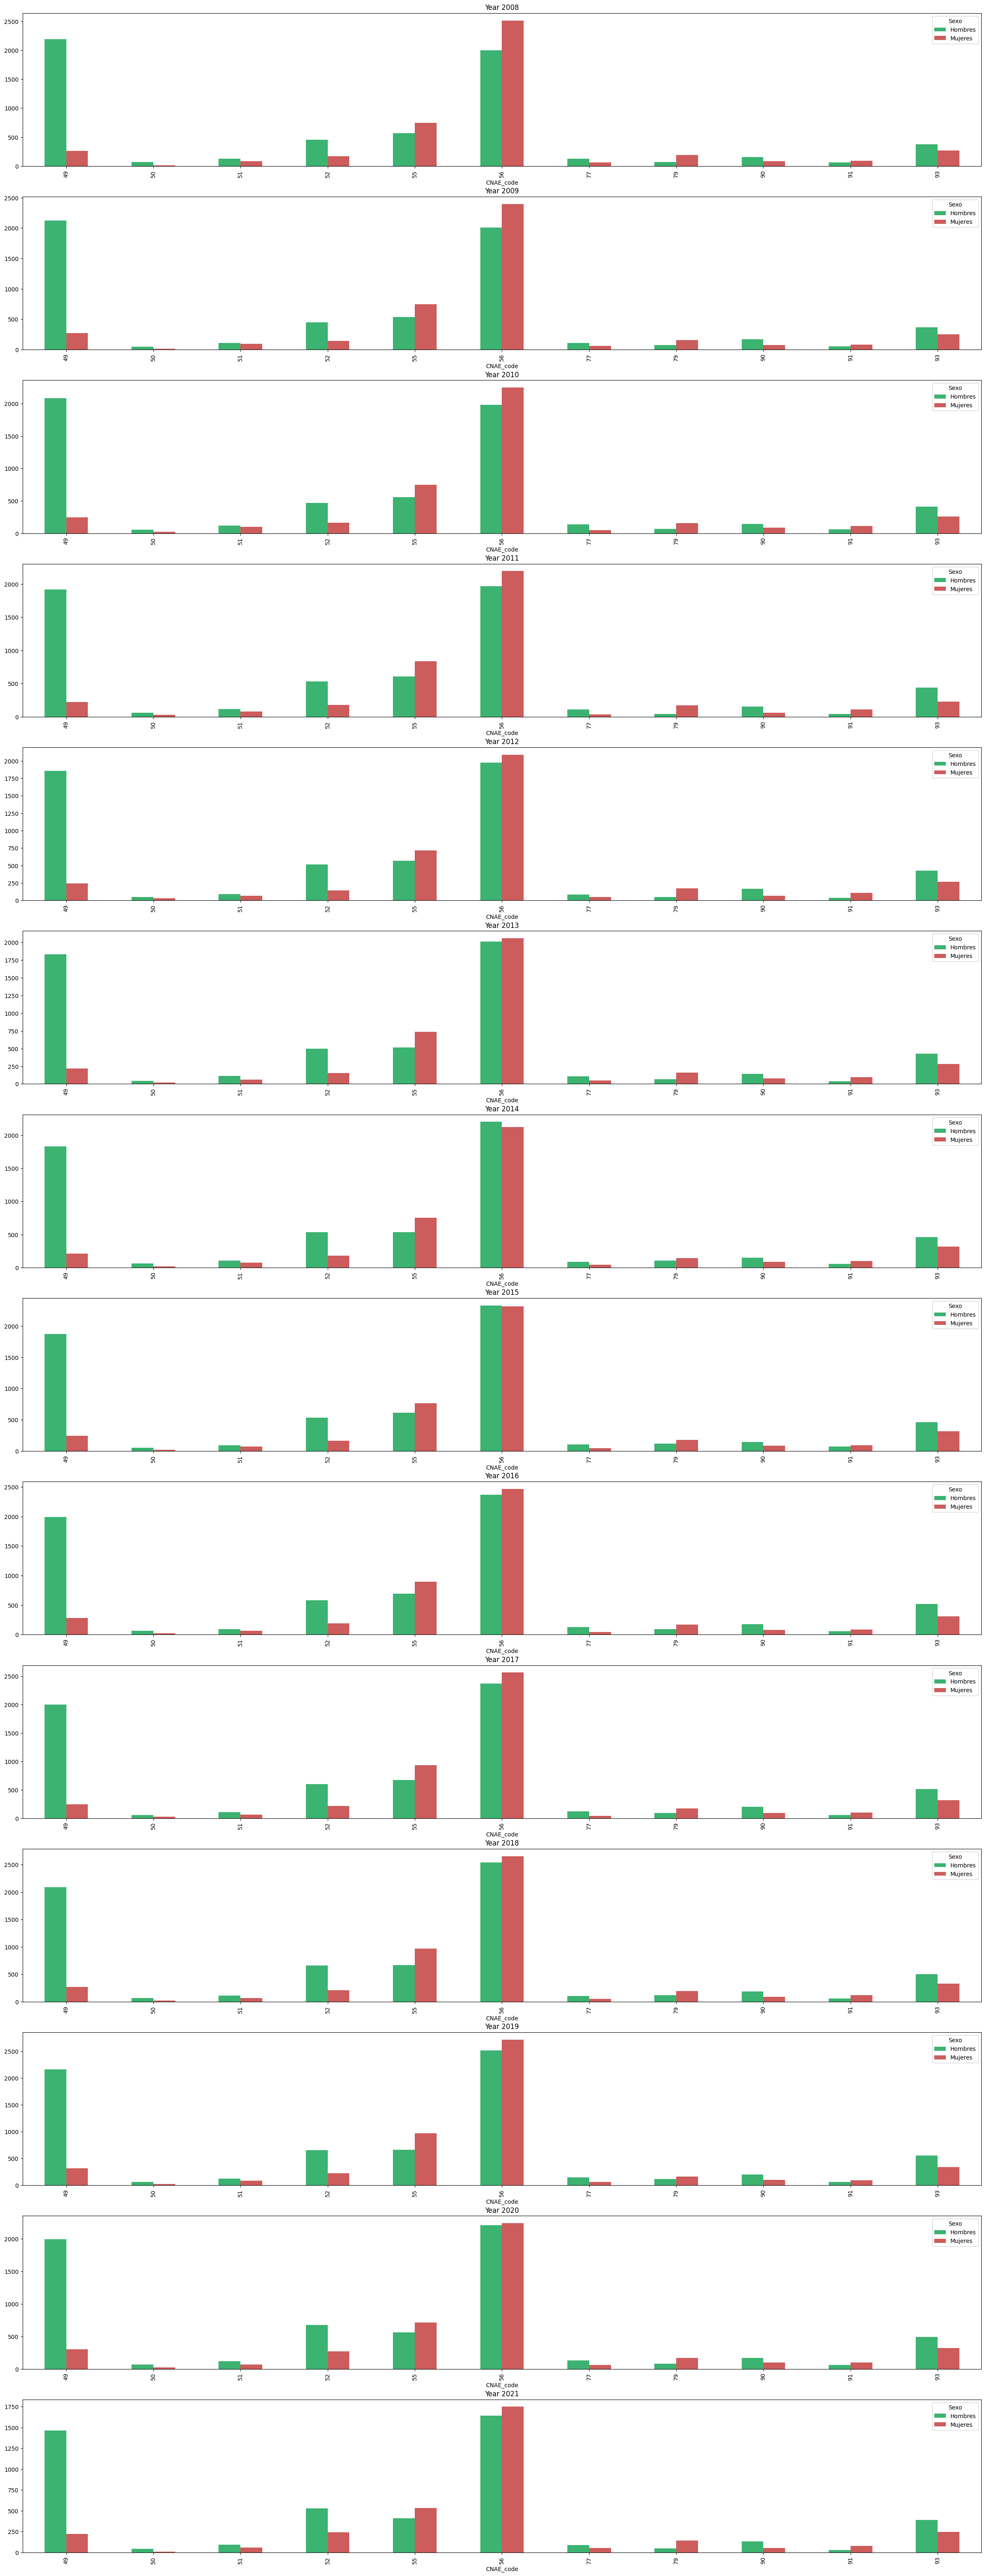

In [ ]:
unique_years = list(grouped_df['Year'].unique())
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(30, 80))
axes = axes.flatten()
for i in range(len(unique_years)):
  df = grouped_df[grouped_df['Year'] == unique_years[i]]
  pivot_df = df.pivot(index='CNAE_code', columns='Sexo', values='Total')
  pivot_df.plot(kind='bar', ax=axes[i], color=['mediumseagreen', 'indianred'])
  axes[i].set_title(f'Year {unique_years[i]}')

2. Plot a bar graph of employed people in the toursim sector by year, sex and CCAA.


In [ ]:
grouped_df = ocupados1[(ocupados1['Comunidades y Ciudades Autónomas'] != 'Total Nacional') & (ocupados1['Sexo'] != 'Ambos sexos')&
 (ocupados1['Rama de actividad CNAE 2009'] != 'Total')].groupby(['Sexo', 'Codigo comunidad', 'Year']).sum().reset_index()
grouped_df = grouped_df.drop(columns=['Quarter'])
grouped_df

<ipython-input-31-0189b2f6ccc3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (ocupados1['Rama de actividad CNAE 2009'] != 'Total')].groupby(['Sexo', 'Codigo comunidad', 'Year']).sum().reset_index()


,Sexo,Codigo comunidad,Year,Total
0,Hombres,1,2008,8599.5
1,Hombres,1,2009,7718.4
2,Hombres,1,2010,7417.6
3,Hombres,1,2011,7214.1
4,Hombres,1,2012,6685.1
...,...,...,...,...
527,Mujeres,19,2017,39.0
528,Mujeres,19,2018,45.7
529,Mujeres,19,2019,45.9
530,Mujeres,19,2020,51.2


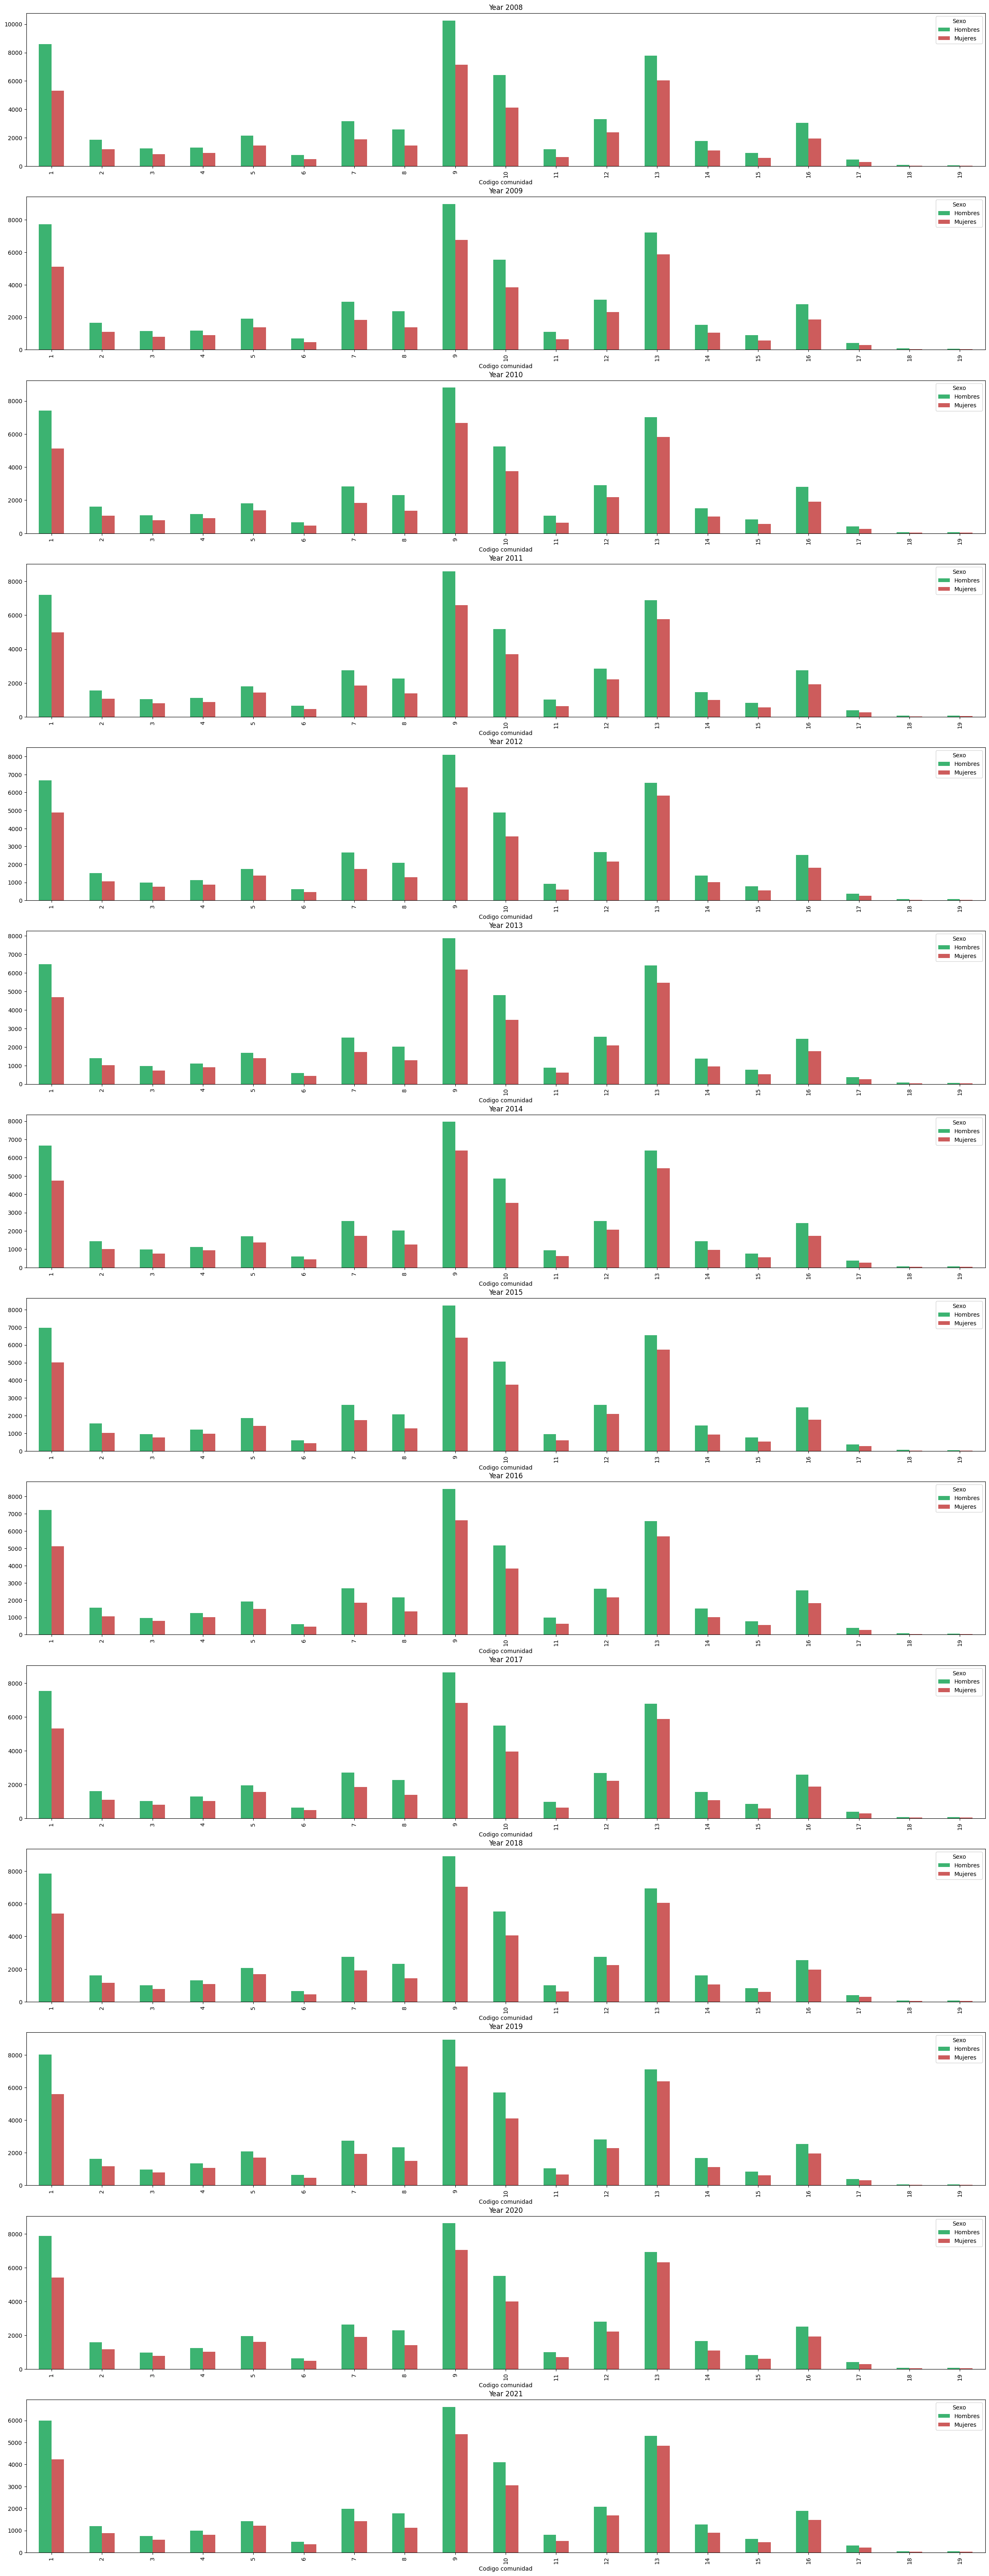

In [ ]:
unique_years = list(grouped_df['Year'].unique())
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(30, 80))
axes = axes.flatten()
for i in range(len(unique_years)):
  df = grouped_df[grouped_df['Year'] == unique_years[i]]
  pivot_df = df.pivot(index='Codigo comunidad', columns='Sexo', values='Total')
  pivot_df.plot(kind='bar', ax=axes[i], color=['mediumseagreen', 'indianred'])
  axes[i].set_title(f'Year {unique_years[i]}')

3. Plot a boxplot graph containing the distribution of the number of tourists by year per CCAA.

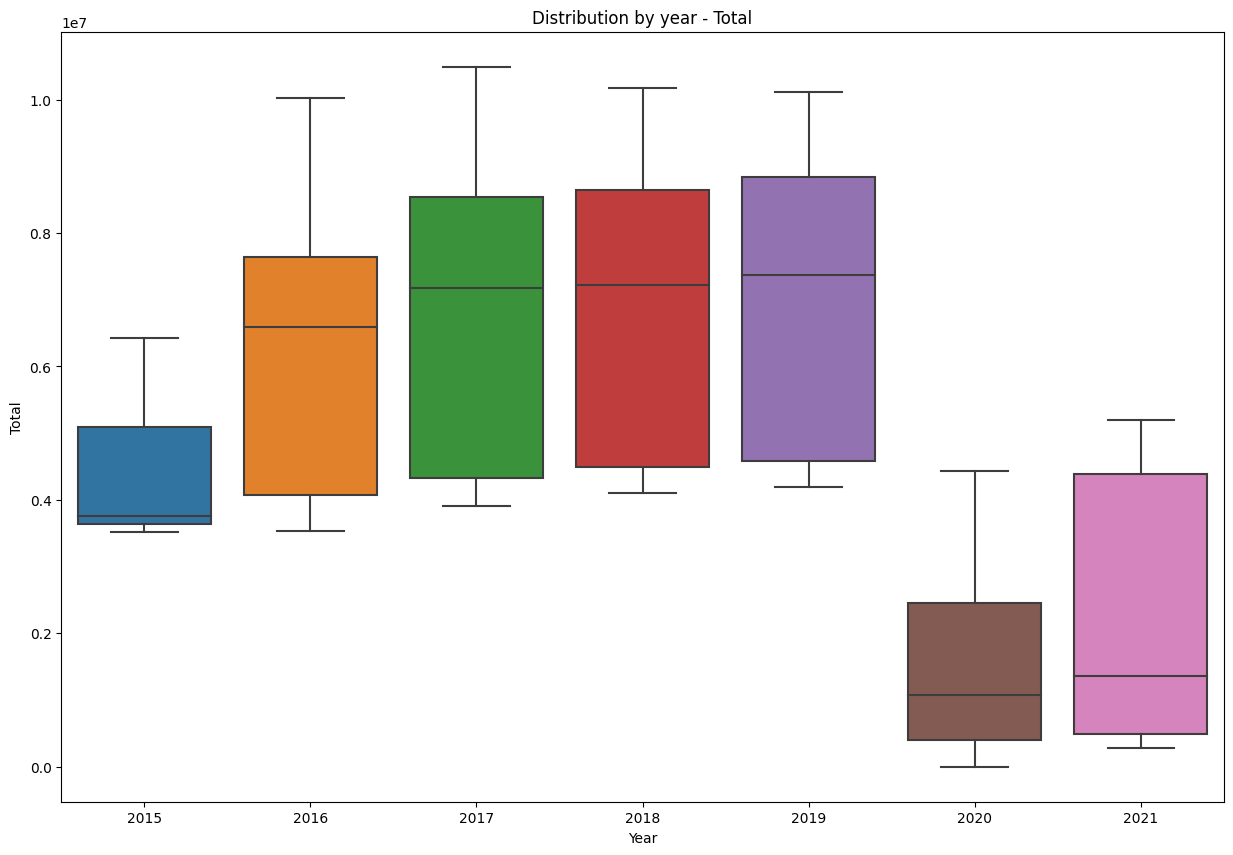

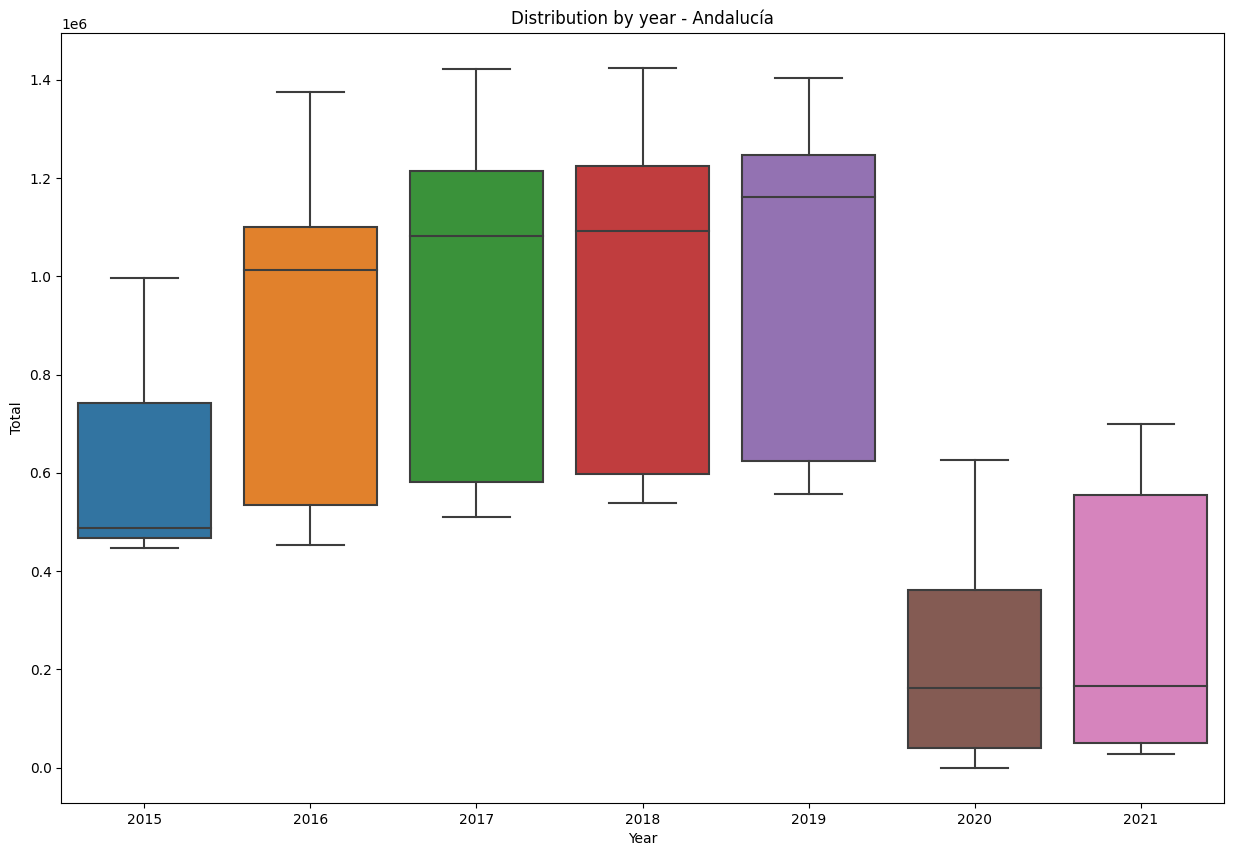

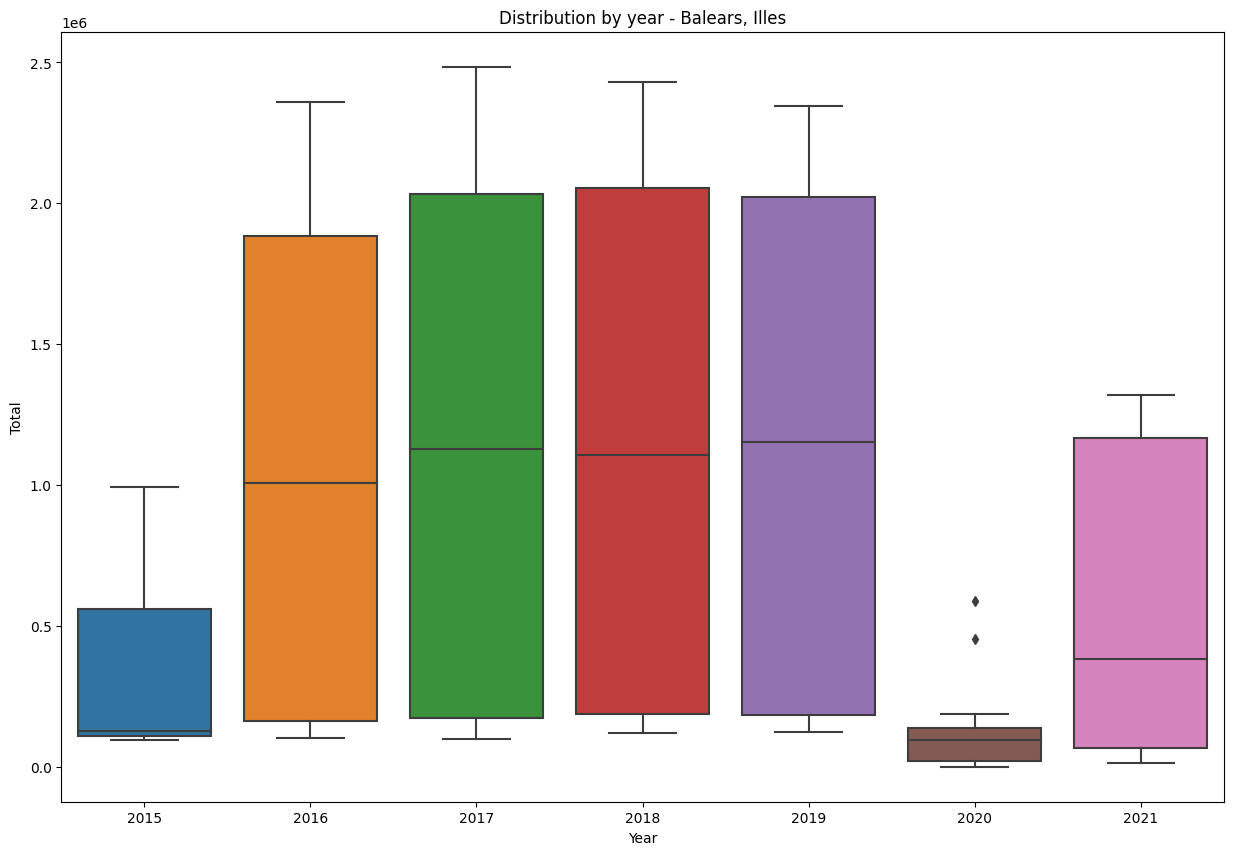

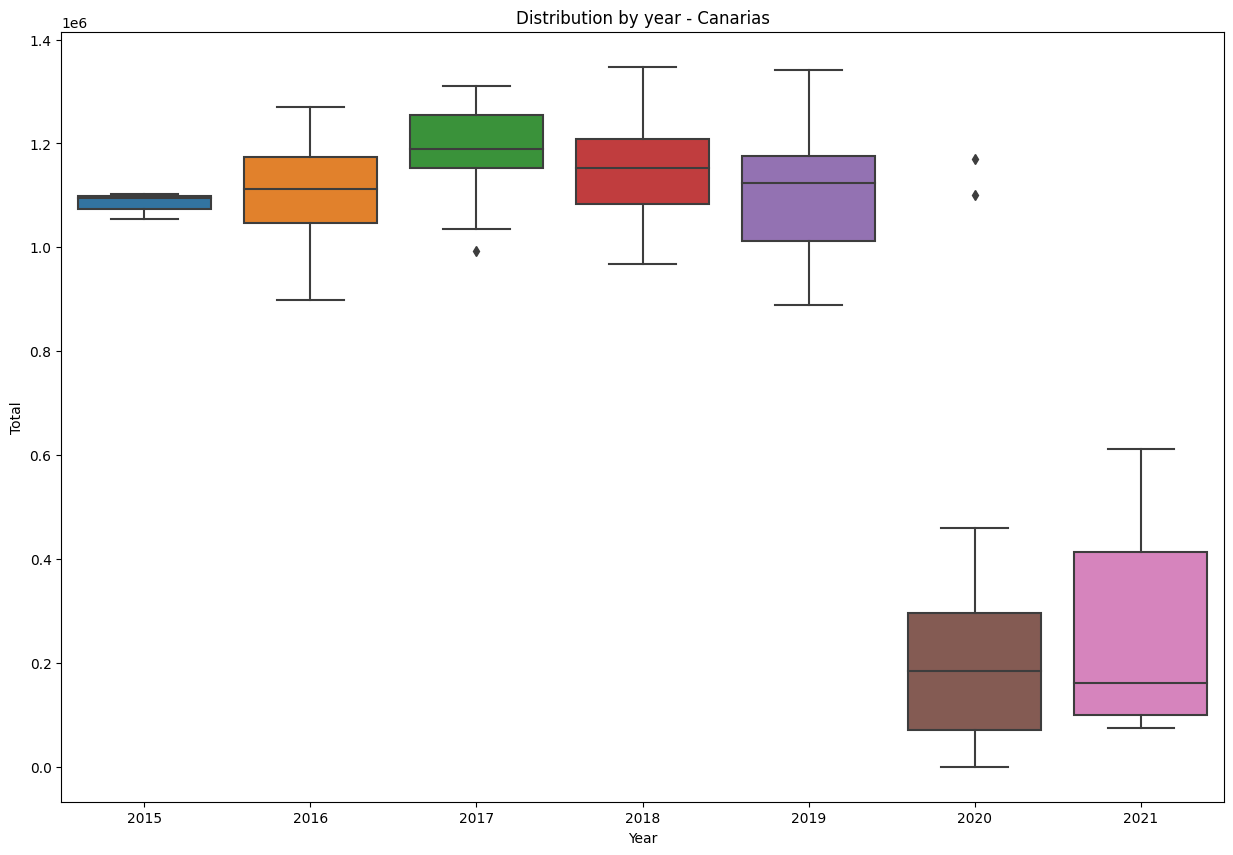

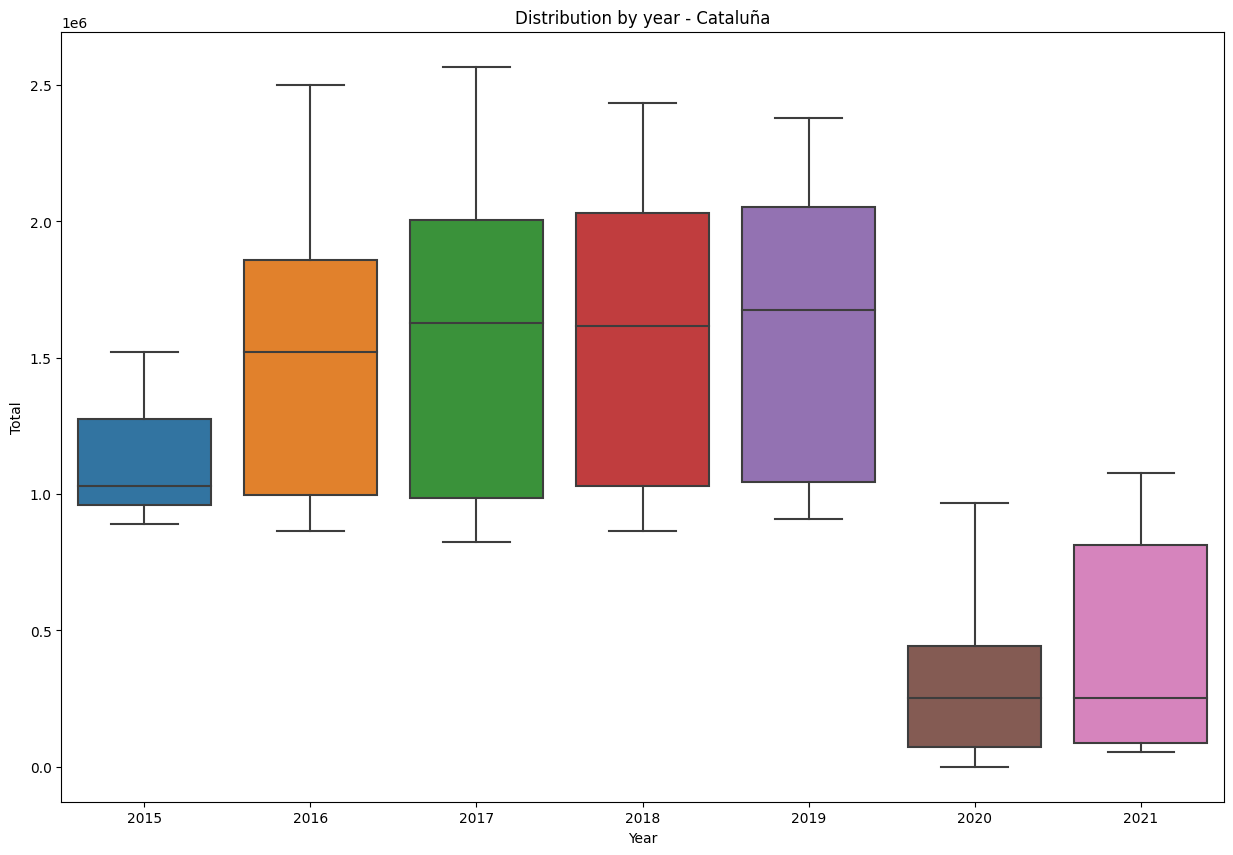

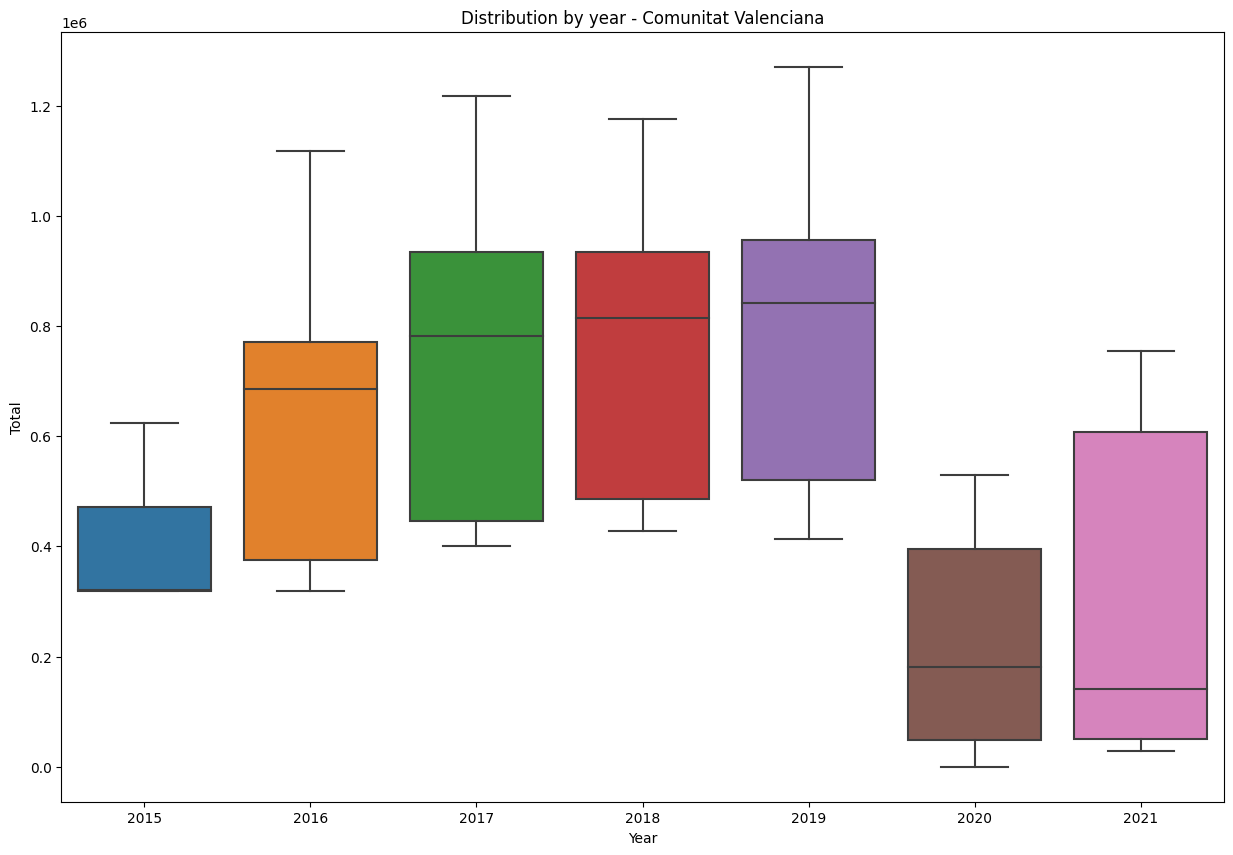

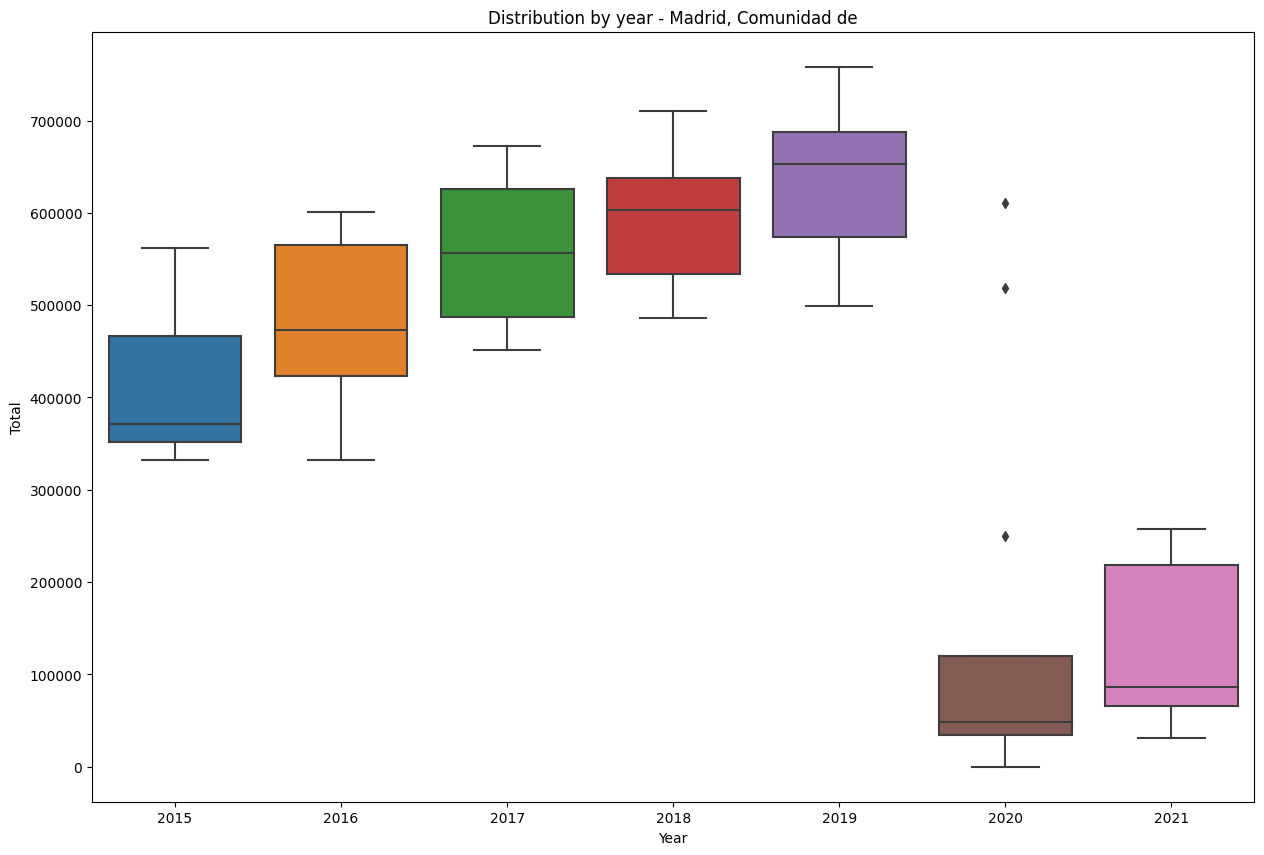

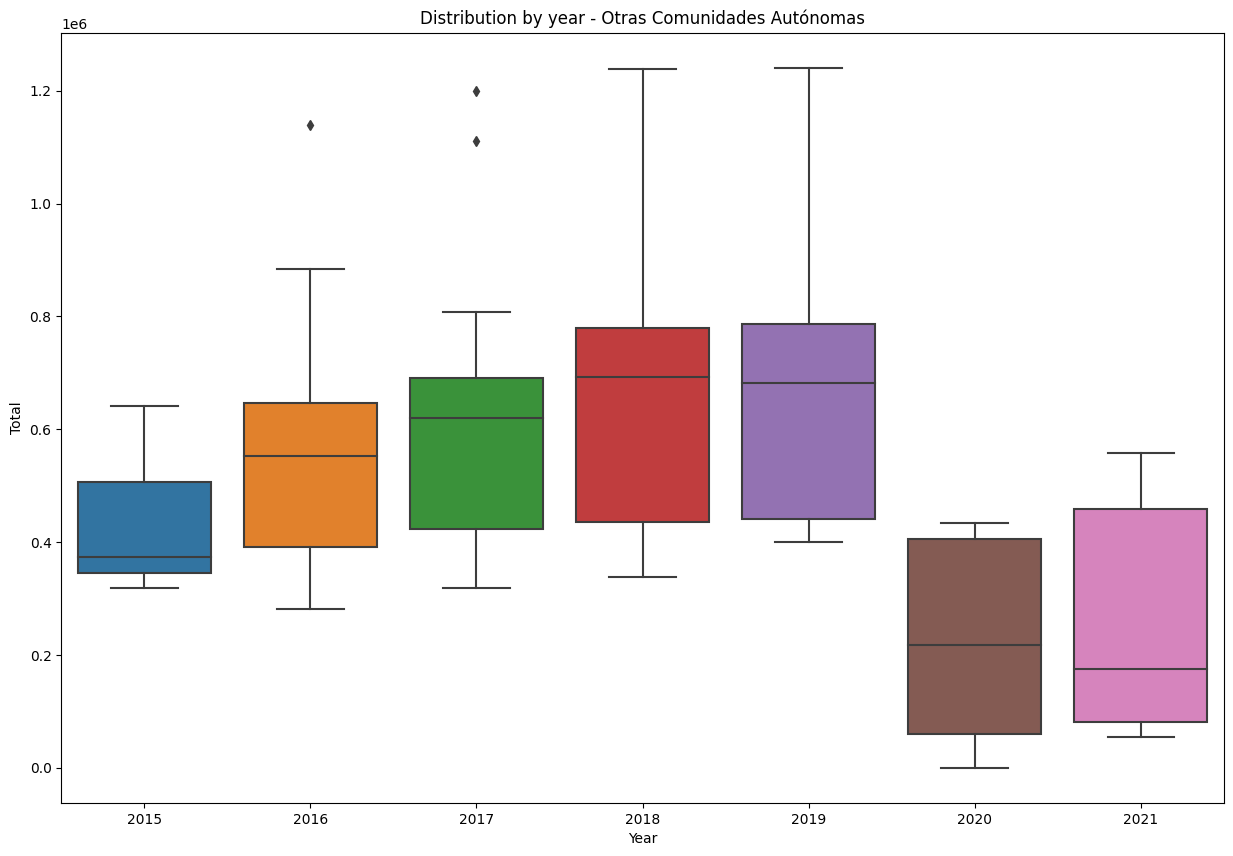

In [ ]:
data = tourist1[(tourist1['Tipo de dato']=='Dato base')]
unique_CA = list(data['Comunidad Autonoma'].unique())
for i in unique_CA:
  filtered_df = data[data['Comunidad Autonoma']==i]

  plt.figure(figsize=(15,10))
  sns.boxplot(x='Year', y='Total', data=filtered_df)
  plt.title(f'Distribution by year - {i}')



## Milestone 4

1. Plot a line plot representing the variation across time of the number of turists by reason for the trip.

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

In [ ]:
#we keep only the values we want for the dataset
filtered_tourist2 = tourist2[tourist2['Tipo de dato'] == 'Dato base']  #we remove 'Tasa de variación anual','Acumulado en lo que va de año' and 'Tasa de variación acumulada'
filtered_tourist2 = filtered_tourist2[filtered_tourist2['Motivo del viaje'] != 'Total']

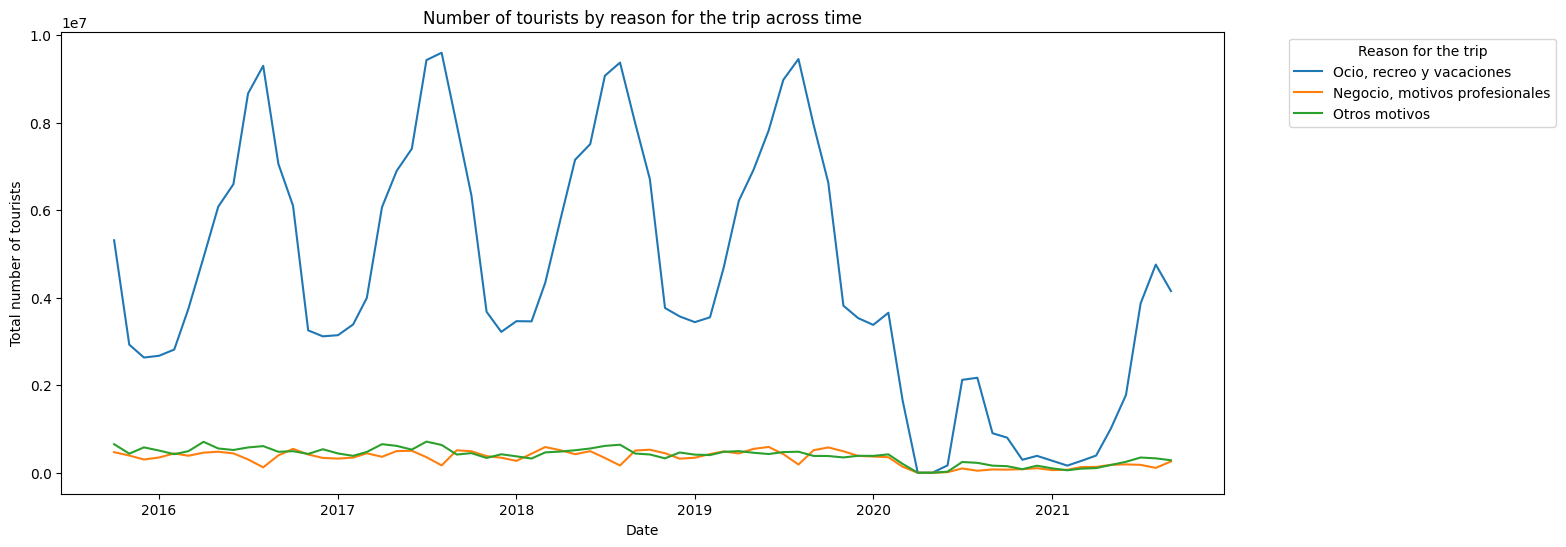

In [ ]:
# create new column to order by time
filtered_tourist2['Date'] = pd.to_datetime(filtered_tourist2[['Year', 'Month']].assign(day=1))

# We use seaborn to create a line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_tourist2, x='Date', y='Total', hue='Motivo del viaje', errorbar=None)
plt.title('Number of tourists by reason for the trip across time')
plt.xlabel('Date')
plt.ylabel('Total number of tourists')
plt.legend(title='Reason for the trip', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

2. Plot the time series of the total and average expenses by CCAA of residency for those trips within the Autonomous Community and outside (*Dentro de la Comunidad Autónoma* and *A otra Comunidad Autónoma*).

In [ ]:
#we keep only the values we want for the dataset
filtered_viajes1 = viajes1[viajes1['Tipo de destino'].isin(['Dentro de la Comunidad Autónoma', 'A otra Comunidad Autónoma'])]
filtered_viajes1 = filtered_viajes1[filtered_viajes1['Tipo de dato'] == 'Valor absoluto']
filtered_viajes1 = filtered_viajes1[filtered_viajes1['Comunidad Autonoma'] != 'Total']

filtered_viajes1_total = filtered_viajes1[filtered_viajes1['Concepto turístico'] == 'Gasto total']
filtered_viajes1_average = filtered_viajes1[filtered_viajes1['Concepto turístico'] == 'Gasto medio por persona']

<ipython-input-19-710e9f78e276>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_viajes1_total['Date'] = filtered_viajes1_total['Year'].astype(str) + ' Q' + filtered_viajes1_total['Quarter'].astype(str)


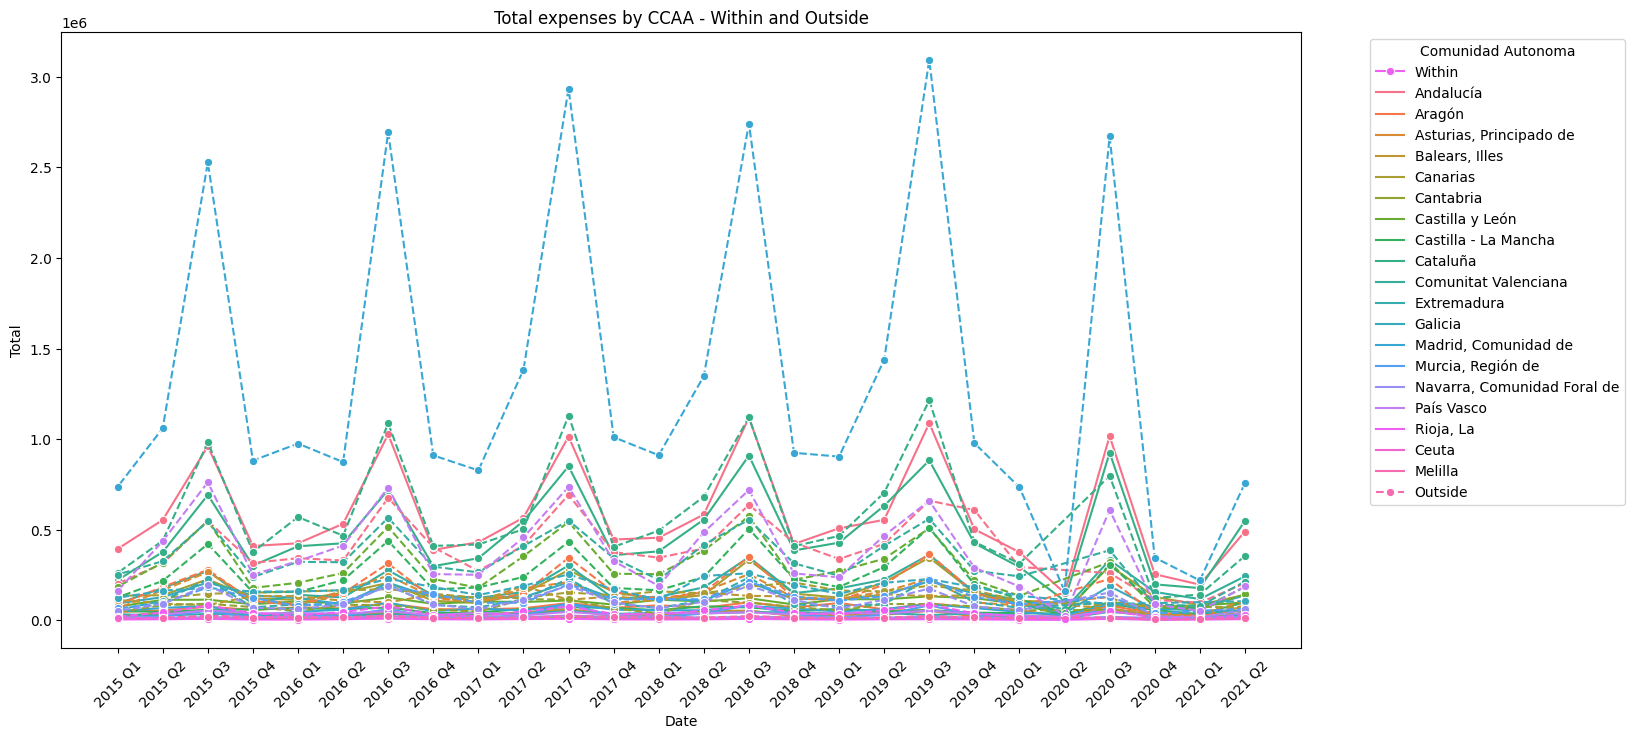

In [ ]:
# create new column for x axis combining Year and Quarter
filtered_viajes1_total['Date'] = filtered_viajes1_total['Year'].astype(str) + ' Q' + filtered_viajes1_total['Quarter'].astype(str)

# Filter for Dentro de la Comunidad Autónoma and A otra Comunidad Autónoma
dentro_ccaa = filtered_viajes1_total[filtered_viajes1_total['Tipo de destino'] == 'Dentro de la Comunidad Autónoma']
otra_ccaa = filtered_viajes1_total[filtered_viajes1_total['Tipo de destino'] == 'A otra Comunidad Autónoma']

# Plotting time series for total expenses
plt.figure(figsize=(16, 8))
sns.lineplot(data=dentro_ccaa, x='Date', y='Total', hue='Comunidad Autonoma', marker='o',label='Within')  # within
sns.lineplot(data=otra_ccaa, x='Date', y='Total', hue='Comunidad Autonoma', marker='o', linestyle='dashed',label='Outside')  # outside

# Combine legends into a single legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Comunidad Autonoma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Total expenses by CCAA - Within and Outside')
plt.xlabel('Date')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()  # ascending x-axis
plt.show()

<ipython-input-20-57ff017071d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_viajes1_average['Date'] = filtered_viajes1_average['Year'].astype(str) + ' Q' + filtered_viajes1_average['Quarter'].astype(str)


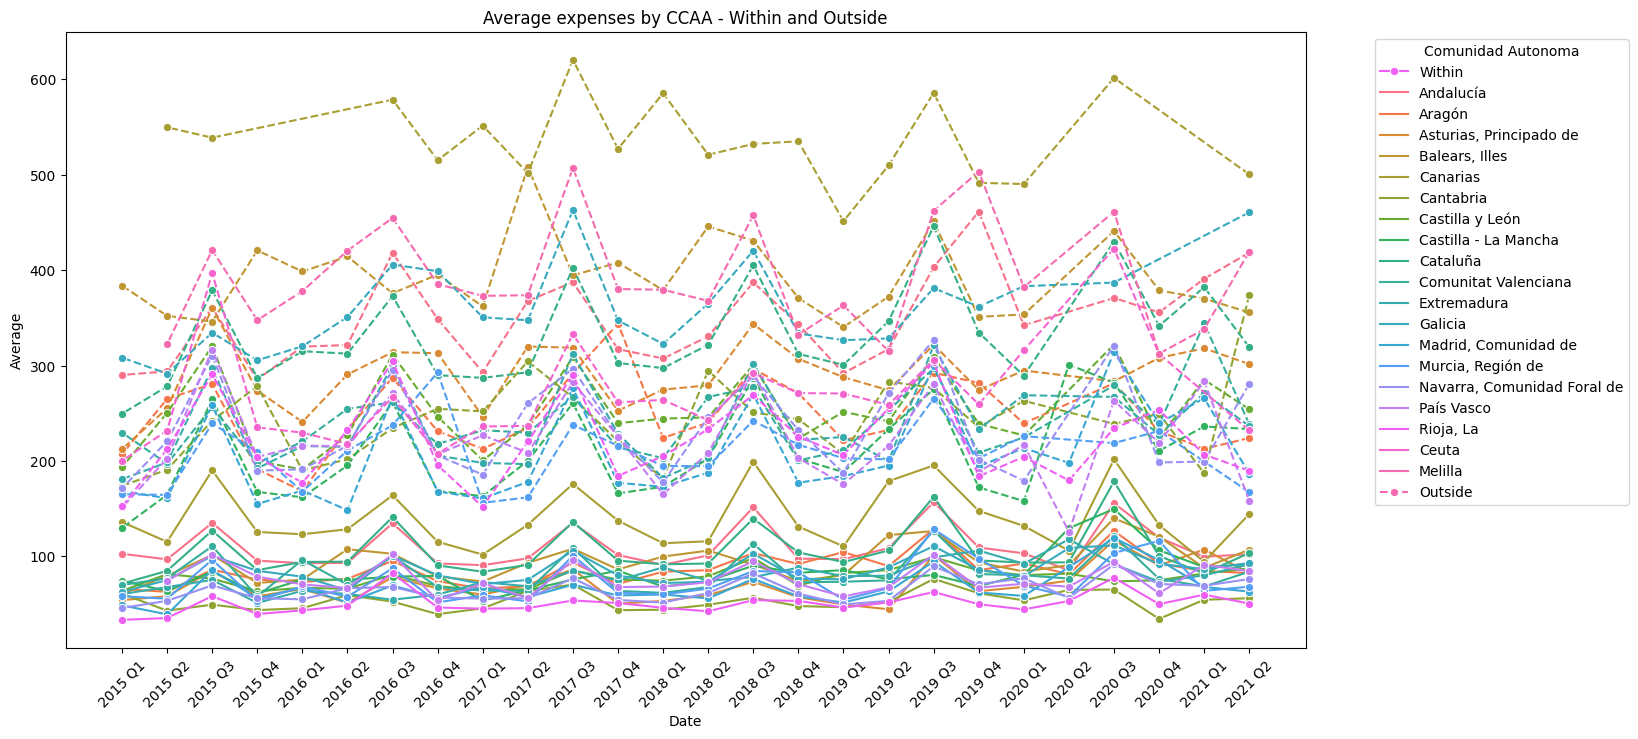

In [ ]:
# create new column for x axis combining Year and Quarter
filtered_viajes1_average['Date'] = filtered_viajes1_average['Year'].astype(str) + ' Q' + filtered_viajes1_average['Quarter'].astype(str)

# Filter for Dentro de la Comunidad Autónoma and A otra Comunidad Autónoma
dentro_ccaa = filtered_viajes1_average[filtered_viajes1_average['Tipo de destino'] == 'Dentro de la Comunidad Autónoma']
otra_ccaa = filtered_viajes1_average[filtered_viajes1_average['Tipo de destino'] == 'A otra Comunidad Autónoma']

# Plotting time series for average expenses
plt.figure(figsize=(16, 8))
sns.lineplot(data=dentro_ccaa, x='Date', y='Total', hue='Comunidad Autonoma', marker='o',label='Within')  # within
sns.lineplot(data=otra_ccaa, x='Date', y='Total', hue='Comunidad Autonoma', marker='o', linestyle='dashed',label='Outside')  # outside

# Combine legends into a single legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Comunidad Autonoma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Average expenses by CCAA - Within and Outside')
plt.xlabel('Date')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()  # ascending x-axis
plt.show()

## Milestone 5

1. Create an interactive map with information about the number of trips, the average duration of the trips, and expenses by CCAA of residency in the year 2021. It must be a choropleth map based on the number of trips.

For this milestone, you need to create a map using the [Folium](https://python-visualization.github.io/folium/) library. You also need to download the boundaries (GeoJson) of the Spanish CCAAs. There are many resources where you can find this information, one of them is [opendatasoft](https://public.opendatasoft.com/explore/?sort=modified).

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

In [ ]:
"""
number of trips, the average duration of the trips, and expenses by CCAA of residency in the year 2021.

tourist1: Número de turistas según comunidad autónoma de destino principal.csv
tourist2: Número de turistas según motivo principal del viaje.csv
viajes1: Viajes con destino principal interno, pernoctaciones, duración media y gasto por tipo de destino principal, según comunidad autónoma de residencia de los viajeros.csv
viajes2 : Viajes, pernoctaciones, duración media y gasto por comunidad autónoma de residencia de los viajeros.csv

ocupados1: Ocupados por rama de actividad, sexo y comunidad autónoma.csv', sep='\t')
ocupados2: Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo.csv
"""

In [ ]:
modified = viajes2[(viajes2['Comunidad Autonoma'] != 'Total') & (viajes2['Year'] == 2021) & (viajes2['Quarter'] == 2) & (viajes2['Tipo de dato'] == "Acumulado en lo que va de año") & ((viajes2['Concepto turístico'] == "Viajes")|(viajes2['Concepto turístico'] == "Duración media de los viajes")|(viajes2['Concepto turístico'] == "Gasto total"))  ]
modified = modified.groupby(["Comunidad Autonoma", "Codigo comunidad", "Concepto turístico"]).agg({"Total": "sum"}).reset_index()
modified = modified.pivot_table(index=["Comunidad Autonoma", "Codigo comunidad"], columns="Concepto turístico", values="Total").reset_index()
modified.columns.name = None
modified

In [ ]:
import json
"""
Descargarse: https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/georef-spain-comunidad-autonoma-millesime/exports/geojson?lang=en&timezone=Europe%2FBerlin
Web: https://public.opendatasoft.com/explore/dataset/georef-spain-comunidad-autonoma-millesime/export/?disjunctive.acom_code&disjunctive.acom_name
"""
geojson = '/content/drive/MyDrive/Colab Notebooks/INE_ddbbs_DataVis_lab/georef-spain-comunidad-autonoma-millesime.geojson'
with open(geojson) as f:
  geojson = json.load(f)



In [ ]:
import folium as folium

for i in geojson["features"]:
  try:
    metric = modified[modified["Codigo comunidad"] == i["properties"]["acom_code"]]
    viajes = metric["Viajes"]
    i["properties"]["viajes"] = viajes.values[0]
    duracion_media = metric["Duración media de los viajes"]
    i["properties"]["duracion_media"] = duracion_media.values[0]
    gastos = metric["Gasto total"]
    i["properties"]["gastos"] = gastos.values[0]

  except:
    i["properties"]["metric"] = 0



map = folium.Map(location=[40, -4], zoom_start=6, width=700, height=700, control_scale=True, tiles="CartoDB Positron")
folium.Choropleth(
    geo_data=geojson,
    name="colorpleth",
    data=modified,
    columns=["Codigo comunidad", "Viajes"],
    key_on="feature.properties.acom_code",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(map)


# Adding labels to map
style_function = lambda x: {'fillColor': '#ffffff',
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000',
                                'color':'#000000',
                                'fillOpacity': 0.50,
                                'weight': 0.1}

labels = folium.features.GeoJson(
    geojson,
    #key_on='feature.properties.acom_code',
    style_function=style_function,
    highlight_function=highlight_function,
    control=False,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['acom_name',
                'acom_code',
                'viajes',
                'duracion_media',
                'gastos'
               ],
        aliases=['Autonomous Community: ',
                 'Code: ',
                 'Number of trips: ',
                 'Average duration of trips: ',
                 'Total expenses: '
                 ],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
        sticky=True
    )
)
map.add_child(labels)
map.keep_in_front(labels)
folium.LayerControl().add_to(map)
map

## Milestone 6

** **This milestone does not count for grade.** **

Save and store the datasets processed for use them in  Lab2: Google Data Studio.


In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/INE_ddbbs_DataVis_lab/'
tourist1.to_csv(path+'tourist1.csv', index=False)
tourist2.to_csv(path+'tourist2.csv', index=False)
viajes1.to_csv(path+'viajes1.csv', index=False)
viajes2.to_csv(path+'viajes2.csv', index=False)
ocupados1.to_csv(path+'ocupados1.csv', index=False)
ocupados2.to_csv(path+'ocupados2.csv', index=False)

In [ ]:
import pickle

# Save each DataFrame to a Pickle file
with open('dataset1.pkl', 'wb') as file:
    pickle.dump(modified, file) # From Milestone 5 for map that represents the data by CCAAs

with open('dataset1.pkl', 'wb') as file:
    pickle.dump(grouped_df, file) # From Milestone 3 for bar chart

with open('dataset1.pkl', 'wb') as file:
    pickle.dump(grouped_df, file) # From Milestone

# Lab2: Google Data Studio


## 0. Lab Preparation

1.  Study and have clear the concepts explained in the theoretical class and the introductory lab.

2.   Gain experience with the use of [Google Data Studio](https://datastudio.google.com/). The goals of this lab will be mainly based on the utilization of this tool to create a dashboard.


## 1. Lab Introduction

* In this lab, we will use the dataset of the previous lab for visualization using [Google Data Studio](https://datastudio.google.com/).

* The lab will be done in groups of 2 people.

* The lab defines a set of guidelines the students must acomplish.

* **The grade will depend directly on the final result of your dashboard. Make it as visual as possible!**

* **Each group should also share their dashboard with the professor upon the finalization of the lab.**


## 2. Lab guidelines

For this practice, you have to use **Google Data Studio**. The style to use is free. The clearer and more visual your dashboard is, the better will be the grade.

Your dashboard must have at least the following elements:

1. A highlight box with total results.
2. A chart with a time series.
3. A pie chart.
4. A bar chart.
5. A table summarizing results.
6. A map that represents the data by CCAAs.

As you can see, the instructions are open-ended. You just have to represent the data in a meaningful way.
You will see that the processing we have done in the first lab is helpful for this part. In case you need to do some extra processing or modification of the data, you must do it in Python in this notebook, and it must be reflected and explained here.


---



To upload your dashboard to AG, click on Share -> Download as PDF -> Add a link back to the report. That will generate a PDF that you have to upload to AG.

Apart from that, for those taking the course remotely, I need you to invite me to your Data Studio project. (Share -> Invite people -> Add people), and to send a word document explaining how you build the dashboard.

In [ ]:

1. Highlight Box with Total Results:
Display the total results from the 'Total' column in the 'Tipo de dato' table.
Calculate and showcase the sum of 'Total' for each Tipo de dato.

3. Pie Chart:
Generate a pie chart to represent the distribution of 'Tipo de dato' or 'Concepto turístico' for a specific year or quarter.
The slices of the pie will represent the proportions of different data types or concepts.

4. Bar Chart:
Create a bar chart to compare tourism data across different quarters or months within a year.
X-axis: Quarter or Month, Y-axis: Total.
Different bars for each 'Tipo de dato' or 'Concepto turístico'.
